In [59]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
pd.options.display.float_format = '{:.1f}'.format

#1 하루 단위 데이터 전처리 과정 + 분석

In [61]:
youtube1 = pd.read_csv('[분석] - 1day 카카오.csv')
youtube1.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio,Unnamed: 16,Unnamed: 17
0,카카오,2020-08-03,88722.0,4080.0,346.0,0.0,1.0,35720.0,2020-08-02,2020-08-02,5.3,1636803.0,5.323741007,1636803,,0.0,NaN,NaN
1,카카오,2020-08-04,37555.0,2219.0,36.0,86.0,2.0,35720.0,2020-08-03,2020-08-03,5.3,1636803.0,-2.245706737,1714642,NaN,4.8,NaN,NaN
2,카카오,2020-08-05,26349.0,1812.0,40.0,0.0,1.0,35720.0,2020-08-04,2020-08-04,-2.2,1714642.0,1.229508197,1075879,NaN,-37.3,,NaN
3,카카오,2020-08-06,95507.0,2215.0,71.0,197.0,2.0,35720.0,2020-08-05,2020-08-05,1.2,1075879.0,1.534170153,1848898,NaN,71.8,NaN,NaN
4,카카오,2020-08-07,14569.0,0.0,0.0,0.0,1.0,35720.0,2020-08-06,2020-08-06,1.5,1848898.0,-4.076086957,1899111,,2.7,NaN,NaN


In [62]:
#결측행열 제거
#결측값 제거 또는 채워넣기 
for i in range(len(youtube1)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube1['Stock'][i] != youtube1['Stock'][i]):
        youtube1.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube1['Price Change'][i]==np.nan):
        youtube1.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube1['Avg Volume'][i]== np.nan):
        youtube1.drop(index=i, axis=0,inplace = True)
        continue 

youtube1 = youtube1.astype({'Avg Volume':np.float64,'Price Change':np.float64,'Avg Volume ratio':np.float64})
youtube1

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio,Unnamed: 16,Unnamed: 17
0,카카오,2020-08-03,88722.0,4080.0,346.0,0.0,1.0,35720.0,2020-08-02,2020-08-02,5.3,1636803.0,5.3,1636803.0,,0.0,NaN,NaN
1,카카오,2020-08-04,37555.0,2219.0,36.0,86.0,2.0,35720.0,2020-08-03,2020-08-03,5.3,1636803.0,-2.2,1714642.0,NaN,4.8,NaN,NaN
2,카카오,2020-08-05,26349.0,1812.0,40.0,0.0,1.0,35720.0,2020-08-04,2020-08-04,-2.2,1714642.0,1.2,1075879.0,NaN,-37.3,,NaN
3,카카오,2020-08-06,95507.0,2215.0,71.0,197.0,2.0,35720.0,2020-08-05,2020-08-05,1.2,1075879.0,1.5,1848898.0,NaN,71.8,NaN,NaN
4,카카오,2020-08-07,14569.0,0.0,0.0,0.0,1.0,35720.0,2020-08-06,2020-08-06,1.5,1848898.0,-4.1,1899111.0,,2.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,카카오,2021-07-27,304812.0,11002.0,188.0,678.0,7.0,35720.0,2021-07-26,2021-07-26,-2.6,4071898.0,0.3,3357695.0,NaN,-17.5,NaN,NaN
226,카카오,2021-07-28,320039.0,9145.0,120.0,1020.0,5.0,35720.0,2021-07-27,2021-07-27,0.3,3357695.0,0.7,2716816.0,NaN,-19.1,NaN,NaN
227,카카오,2021-07-29,217436.0,4973.0,120.0,729.0,5.0,35720.0,2021-07-28,2021-07-28,0.7,2716816.0,0.0,1766172.0,NaN,-35.0,NaN,NaN
228,카카오,2021-07-30,531999.0,21195.0,504.0,1379.0,4.0,35720.0,2021-07-29,2021-07-29,0.0,1766172.0,-1.3,2057332.0,NaN,16.5,NaN,NaN


In [63]:
#분석과 관련 없는 열 제거
youtube1.drop(['Code','Start Date','End Date','Pre Price Change','Pre Avg Volume','Price Change ratio','Unnamed: 16','Unnamed: 17'], axis=1,inplace = True)
youtube1

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,카카오,2020-08-03,88722.0,4080.0,346.0,0.0,1.0,5.3,1636803.0,0.0
1,카카오,2020-08-04,37555.0,2219.0,36.0,86.0,2.0,-2.2,1714642.0,4.8
2,카카오,2020-08-05,26349.0,1812.0,40.0,0.0,1.0,1.2,1075879.0,-37.3
3,카카오,2020-08-06,95507.0,2215.0,71.0,197.0,2.0,1.5,1848898.0,71.8
4,카카오,2020-08-07,14569.0,0.0,0.0,0.0,1.0,-4.1,1899111.0,2.7
...,...,...,...,...,...,...,...,...,...,...
225,카카오,2021-07-27,304812.0,11002.0,188.0,678.0,7.0,0.3,3357695.0,-17.5
226,카카오,2021-07-28,320039.0,9145.0,120.0,1020.0,5.0,0.7,2716816.0,-19.1
227,카카오,2021-07-29,217436.0,4973.0,120.0,729.0,5.0,0.0,1766172.0,-35.0
228,카카오,2021-07-30,531999.0,21195.0,504.0,1379.0,4.0,-1.3,2057332.0,16.5


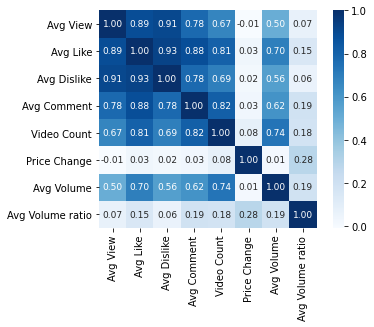

In [64]:
data = youtube1.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' : 9}, fmt = '.2f', square = True, cmap = 'Blues')

#2 2일 단위 데이터 전처리 과정 + 분석

In [72]:
youtube2 = pd.read_csv('[분석] - 2day 카카오.csv')
youtube2.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,2020-08-03 - 2020-08-04,63138.5,3149.5,191.0,43.0,3,35720,2020. 8. 1,2020. 8. 2,5.3,NaN,6.5,1675722.5,NaN,NaN
1,카카오,2020-08-05 - 2020-08-06,60928.0,2013.5,55.5,98.5,3,35720,2020. 8. 3,2020. 8. 4,6.5,1675722.5,-0.5,1462388.5,NaN,-12.7
2,카카오,2020-08-07 - 2020-08-08,63297.0,1782.0,31.5,95.0,3,35720,2020. 8. 5,2020. 8. 6,-0.5,1462388.5,-3.3,1899111.0,NaN,29.9
3,카카오,2020-08-09 - 2020-08-10,221717.0,3774.0,93.0,301.0,2,35720,2020. 8. 7,2020. 8. 8,-3.3,1899111.0,2.9,1086391.0,NaN,-42.8
4,카카오,2020-08-11 - 2020-08-12,162646.5,3699.5,55.0,138.0,4,35720,2020. 8. 9,2020. 8. 10,2.9,1086391.0,0.7,739859.5,NaN,-31.9


In [73]:
#결측행열 제거
#결측값 제거 또는 채워넣기 
for i in range(len(youtube2)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube2['Stock'][i] != youtube2['Stock'][i]):
        youtube2.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube2['Price Change'][i]==np.nan):
        youtube2.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube2['Avg Volume'][i]== np.nan):
        youtube2.drop(index=i, axis=0,inplace = True)
        continue 
#Like와 DisLike가 0인 경우 Ratio는 평균값으로 채워넣는다.
#youtube2['Price Change'].fillna(youtube2['Price Change'].mean())
youtube2 = youtube2.astype({'Avg Volume':np.float64, 'Price Change': np.float64})
youtube2

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,2020-08-03 - 2020-08-04,63138.5,3149.5,191.0,43.0,3,35720,2020. 8. 1,2020. 8. 2,5.3,NaN,6.5,1675722.5,NaN,NaN
1,카카오,2020-08-05 - 2020-08-06,60928.0,2013.5,55.5,98.5,3,35720,2020. 8. 3,2020. 8. 4,6.5,1675722.5,-0.5,1462388.5,NaN,-12.7
2,카카오,2020-08-07 - 2020-08-08,63297.0,1782.0,31.5,95.0,3,35720,2020. 8. 5,2020. 8. 6,-0.5,1462388.5,-3.3,1899111.0,NaN,29.9
3,카카오,2020-08-09 - 2020-08-10,221717.0,3774.0,93.0,301.0,2,35720,2020. 8. 7,2020. 8. 8,-3.3,1899111.0,2.9,1086391.0,NaN,-42.8
4,카카오,2020-08-11 - 2020-08-12,162646.5,3699.5,55.0,138.0,4,35720,2020. 8. 9,2020. 8. 10,2.9,1086391.0,0.7,739859.5,NaN,-31.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,카카오,2021-07-23 - 2021-07-24,625730.5,22091.0,579.5,1192.5,17,35720,2021. 7. 21,2021. 7. 22,-3.6,8084552.0,-0.7,5249906.0,NaN,-35.1
148,카카오,2021-07-25 - 2021-07-26,249716.5,9667.0,200.0,666.0,12,35720,2021. 7. 23,2021. 7. 24,-0.7,5249906.0,-2.6,4071898.0,NaN,-22.4
149,카카오,2021-07-27 - 2021-07-28,312425.5,10073.5,154.0,849.0,12,35720,2021. 7. 25,2021. 7. 26,-2.6,4071898.0,0.3,3037255.5,NaN,-25.4
150,카카오,2021-07-29 - 2021-07-30,374717.5,13084.0,312.0,1054.0,9,35720,2021. 7. 27,2021. 7. 28,0.3,3037255.5,-1.0,1911752.0,NaN,-37.1


In [74]:
#분석과 관련 없는 열 제거
youtube2.drop(['Code','Start Date','End Date','Price Change ratio','Pre Price Change','Pre Avg Volume','Price Change ratio'], axis=1,inplace = True)
youtube2

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,카카오,2020-08-03 - 2020-08-04,63138.5,3149.5,191.0,43.0,3,6.5,1675722.5,NaN
1,카카오,2020-08-05 - 2020-08-06,60928.0,2013.5,55.5,98.5,3,-0.5,1462388.5,-12.7
2,카카오,2020-08-07 - 2020-08-08,63297.0,1782.0,31.5,95.0,3,-3.3,1899111.0,29.9
3,카카오,2020-08-09 - 2020-08-10,221717.0,3774.0,93.0,301.0,2,2.9,1086391.0,-42.8
4,카카오,2020-08-11 - 2020-08-12,162646.5,3699.5,55.0,138.0,4,0.7,739859.5,-31.9
...,...,...,...,...,...,...,...,...,...,...
147,카카오,2021-07-23 - 2021-07-24,625730.5,22091.0,579.5,1192.5,17,-0.7,5249906.0,-35.1
148,카카오,2021-07-25 - 2021-07-26,249716.5,9667.0,200.0,666.0,12,-2.6,4071898.0,-22.4
149,카카오,2021-07-27 - 2021-07-28,312425.5,10073.5,154.0,849.0,12,0.3,3037255.5,-25.4
150,카카오,2021-07-29 - 2021-07-30,374717.5,13084.0,312.0,1054.0,9,-1.0,1911752.0,-37.1


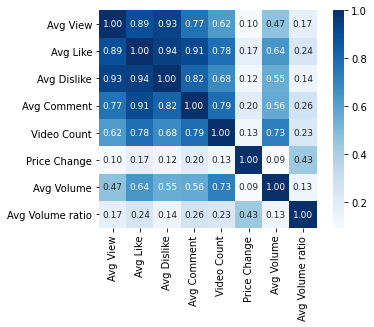

In [75]:
data = youtube2.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' : 9}, fmt = '.2f', square = True, cmap = 'Blues')

#3 1주 단위 데이터 전처리 과정 + 분석

In [76]:
youtube3 = pd.read_csv('[분석] - 7day 카카오.csv')
youtube3.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio,Unnamed: 16
0,카카오,2020-08-03 - 2020-08-09,62454.5,2315.0,92.7,78.8,9.0,35720.0,2020-07-27,2020-07-31,7.0,757905.8,1.582733813,1635066.6,,115.7,
1,카카오,2020-08-10 - 2020-08-16,105306.5,2517.3,44.8,121.8,10.0,35720.0,2020-08-03,2020-08-07,1.6,1635066.6,4.768786127,901954.2,,-44.8,NaN
2,카카오,2020-08-17 - 2020-08-23,62048.0,3172.0,63.7,349.0,6.0,35720.0,2020-08-10,2020-08-14,4.8,901954.2,-0.4037685061,1774875.8,,96.8,NaN
3,카카오,2020-08-24 - 2020-08-30,288582.8,6546.8,159.6,429.0,14.0,35720.0,2020-08-17,2020-08-21,-0.4,1774875.8,8.277703605,1339449.2,NaN,-24.5,NaN
4,카카오,2020-08-31 - 2020-09-06,85313.7,3151.0,64.9,257.6,11.0,35720.0,2020-08-24,2020-08-28,8.3,1339449.2,-2.070645554,1111977.2,NaN,-17.0,NaN


In [77]:
#결측행열 제거
#결측값 제거 또는 채워넣기 
for i in range(len(youtube3)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube3['Stock'][i] != youtube3['Stock'][i]):
        youtube3.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube3['Price Change'][i]==np.nan):
        youtube3.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube3['Avg Volume'][i]== np.nan):
        youtube3.drop(index=i, axis=0,inplace = True)
        continue 
#Like와 DisLike가 0인 경우 Ratio는 평균값으로 채워넣는다.
#youtube2['Price Change'].fillna(youtube2['Price Change'].mean())
youtube3 = youtube3.astype({'Avg Volume':np.float64, 'Price Change': np.float64})
youtube3

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio,Unnamed: 16
0,카카오,2020-08-03 - 2020-08-09,62454.5,2315.0,92.7,78.8,9.0,35720.0,2020-07-27,2020-07-31,7.0,757905.8,1.6,1635066.6,,115.7,
1,카카오,2020-08-10 - 2020-08-16,105306.5,2517.3,44.8,121.8,10.0,35720.0,2020-08-03,2020-08-07,1.6,1635066.6,4.8,901954.2,,-44.8,NaN
2,카카오,2020-08-17 - 2020-08-23,62048.0,3172.0,63.7,349.0,6.0,35720.0,2020-08-10,2020-08-14,4.8,901954.2,-0.4,1774875.8,,96.8,NaN
3,카카오,2020-08-24 - 2020-08-30,288582.8,6546.8,159.6,429.0,14.0,35720.0,2020-08-17,2020-08-21,-0.4,1774875.8,8.3,1339449.2,NaN,-24.5,NaN
4,카카오,2020-08-31 - 2020-09-06,85313.7,3151.0,64.9,257.6,11.0,35720.0,2020-08-24,2020-08-28,8.3,1339449.2,-2.1,1111977.2,NaN,-17.0,NaN
5,카카오,2020-09-07 - 2020-09-13,46870.5,2457.0,67.0,170.0,3.0,35720.0,2020-08-31,2020-09-04,-2.1,1111977.2,-5.6,922919.8,NaN,-17.0,NaN
6,카카오,2020-09-14 - 2020-09-20,89524.2,2172.0,77.8,107.0,5.0,35720.0,2020-09-07,2020-09-11,-5.6,922919.8,-1.1,657797.0,NaN,-28.7,NaN
7,카카오,2020-09-21 - 2020-09-27,143503.3,2830.7,70.7,64.7,3.0,35720.0,2020-09-14,2020-09-18,-1.1,657797.0,-5.4,710861.2,NaN,8.1,NaN
8,카카오,2020-09-28 - 2020-10-04,91629.5,2354.0,60.5,71.0,2.0,35720.0,2020-09-21,2020-09-25,-5.4,710861.2,3.9,643379.5,NaN,-9.5,NaN
9,카카오,2020-10-05 - 2020-10-11,98723.3,2976.3,105.0,211.7,5.0,35720.0,2020-09-28,2020-10-02,3.9,643379.5,3.1,577627.5,NaN,-10.2,NaN


In [78]:
#분석과 관련 없는 열 제거
youtube3.drop(['Code','Start Date','End Date','Price Change ratio','Pre Price Change','Pre Avg Volume','Price Change ratio','Unnamed: 16'], axis=1,inplace = True)
youtube3

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,카카오,2020-08-03 - 2020-08-09,62454.5,2315.0,92.7,78.8,9.0,1.6,1635066.6,115.7
1,카카오,2020-08-10 - 2020-08-16,105306.5,2517.3,44.8,121.8,10.0,4.8,901954.2,-44.8
2,카카오,2020-08-17 - 2020-08-23,62048.0,3172.0,63.7,349.0,6.0,-0.4,1774875.8,96.8
3,카카오,2020-08-24 - 2020-08-30,288582.8,6546.8,159.6,429.0,14.0,8.3,1339449.2,-24.5
4,카카오,2020-08-31 - 2020-09-06,85313.7,3151.0,64.9,257.6,11.0,-2.1,1111977.2,-17.0
5,카카오,2020-09-07 - 2020-09-13,46870.5,2457.0,67.0,170.0,3.0,-5.6,922919.8,-17.0
6,카카오,2020-09-14 - 2020-09-20,89524.2,2172.0,77.8,107.0,5.0,-1.1,657797.0,-28.7
7,카카오,2020-09-21 - 2020-09-27,143503.3,2830.7,70.7,64.7,3.0,-5.4,710861.2,8.1
8,카카오,2020-09-28 - 2020-10-04,91629.5,2354.0,60.5,71.0,2.0,3.9,643379.5,-9.5
9,카카오,2020-10-05 - 2020-10-11,98723.3,2976.3,105.0,211.7,5.0,3.1,577627.5,-10.2


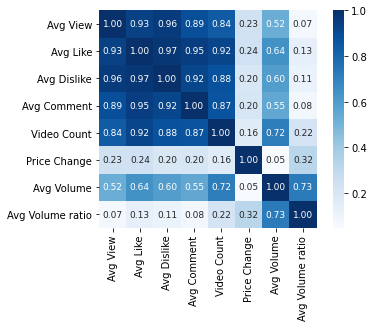

In [79]:
data = youtube3.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' : 9}, fmt = '.2f', square = True, cmap = 'Blues')

#4 1개월 단위 데이터 전처리 과정 + 분석

In [80]:
youtube4 = pd.read_csv('[분석] - 1month 카카오.csv')
youtube4.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,8월,138044.6,3624.2,91.7,222.7,41,35720,2020. 7. 1,2020. 7. 31,26.5,1347328.9,21.1,1378034.5,NaN,2.3
1,카카오,9월,76924.7,2500.1,63.5,156.1,21,35720,2020. 8. 3,2020. 8. 31,17.1,1405580.2,-8.6,778702.4,NaN,-44.6
2,카카오,10월,63789.4,1872.9,51.4,111.5,13,35720,2020. 9. 1,2020. 9. 30,-10.4,794037.3,-8.5,530539.6,NaN,-33.2
3,카카오,11월,71852.9,2141.1,41.5,126.1,14,35720,2020. 10. 1,2020. 10. 30,-8.5,530539.6,11.3,641077.3,NaN,20.8
4,카카오,12월,43979.1,1563.2,28.8,38.8,13,35720,2020. 11. 2,2020. 11. 30,11.3,636501.8,3.7,655028.8,NaN,2.9


In [81]:
#결측행열 제거
#결측값 제거 또는 채워넣기 
for i in range(len(youtube4)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube4['Stock'][i] != youtube4['Stock'][i]):
        youtube4.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube4['Price Change'][i]==np.nan):
        youtube4.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube4['Avg Volume'][i]== np.nan):
        youtube4.drop(index=i, axis=0,inplace = True)
        continue 

youtube4 = youtube4.astype({'Avg Volume':np.float64,'Price Change':np.float64})
youtube4

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,8월,138044.6,3624.2,91.7,222.7,41,35720,2020. 7. 1,2020. 7. 31,26.5,1347328.9,21.1,1378034.5,NaN,2.3
1,카카오,9월,76924.7,2500.1,63.5,156.1,21,35720,2020. 8. 3,2020. 8. 31,17.1,1405580.2,-8.6,778702.4,NaN,-44.6
2,카카오,10월,63789.4,1872.9,51.4,111.5,13,35720,2020. 9. 1,2020. 9. 30,-10.4,794037.3,-8.5,530539.6,NaN,-33.2
3,카카오,11월,71852.9,2141.1,41.5,126.1,14,35720,2020. 10. 1,2020. 10. 30,-8.5,530539.6,11.3,641077.3,NaN,20.8
4,카카오,12월,43979.1,1563.2,28.8,38.8,13,35720,2020. 11. 2,2020. 11. 30,11.3,636501.8,3.7,655028.8,NaN,2.9
5,카카오,1월,85809.8,3258.6,56.0,193.0,23,35720,2020. 12. 1,2020. 12. 31,7.2,645395.2,12.6,1086285.4,NaN,68.3
6,카카오,2월,172276.0,4538.9,87.3,244.1,44,35720,2021. 1. 1,2021. 1. 29,12.5,1086285.4,12.7,796095.4,NaN,-26.7
7,카카오,3월,152913.6,3564.9,80.7,187.4,37,35720,2021. 2. 1,2021. 2. 26,11.9,796095.4,-0.6,556387.0,NaN,-30.1
8,카카오,4월,158326.6,5739.4,109.3,236.2,77,35720,2021. 3. 1,2021. 3. 31,-0.2,550010.1,14.9,3569705.2,NaN,549.0
9,카카오,5월,105329.8,3602.0,75.5,117.3,37,35720,2021. 4. 1,2021. 4. 30,13.5,3731108.8,9.3,2690448.6,NaN,-27.9


In [82]:
#분석과 관련 없는 열 제거(code,open,close)
youtube4.drop(['Code','Start Date','End Date','Price Change ratio','Pre Price Change','Pre Avg Volume','Price Change ratio'], axis=1,inplace = True)
youtube4

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,카카오,8월,138044.6,3624.2,91.7,222.7,41,21.1,1378034.5,2.3
1,카카오,9월,76924.7,2500.1,63.5,156.1,21,-8.6,778702.4,-44.6
2,카카오,10월,63789.4,1872.9,51.4,111.5,13,-8.5,530539.6,-33.2
3,카카오,11월,71852.9,2141.1,41.5,126.1,14,11.3,641077.3,20.8
4,카카오,12월,43979.1,1563.2,28.8,38.8,13,3.7,655028.8,2.9
5,카카오,1월,85809.8,3258.6,56.0,193.0,23,12.6,1086285.4,68.3
6,카카오,2월,172276.0,4538.9,87.3,244.1,44,12.7,796095.4,-26.7
7,카카오,3월,152913.6,3564.9,80.7,187.4,37,-0.6,556387.0,-30.1
8,카카오,4월,158326.6,5739.4,109.3,236.2,77,14.9,3569705.2,549.0
9,카카오,5월,105329.8,3602.0,75.5,117.3,37,9.3,2690448.6,-27.9


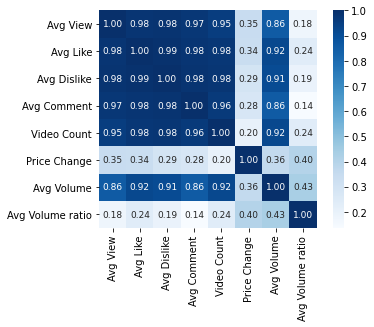

In [83]:
data = youtube4.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' : 9}, fmt = '.2f', square = True, cmap = 'Blues')

#4 3개월 단위 데이터 전처리 과정 + 분석

In [88]:
youtube5 = pd.read_csv('[분석] - 3month 카카오.csv')
youtube5.head()

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,8-10,3279.5,94.1,2.4,5.8,75,35720,2020. 5. 1,2020. 7. 31,89.3,1433413.0,2.1,918157.4,NaN,-35.9
1,카카오,11-1,2291.4,79.1,1.4,4.1,50,35720,2020. 8. 3,2020. 10. 30,-5.0,914444.0,38.6,779925.4,NaN,-14.7
2,카카오,2-4,5557.7,159.1,3.2,7.7,158,35720,2020. 11. 2,2021. 1. 29,33.4,784605.5,34.2,1601988.3,NaN,104.2
3,카카오,5-7,8540.1,310.3,6.0,16.0,376,35720,2021. 2. 1,2021. 4. 30,30.2,1649508.6,32.0,4260511.5,NaN,158.3


In [89]:
#결측행열 제거
#결측값 제거 또는 채워넣기 
for i in range(len(youtube5)):
    #Stock 값이 nan인 경우(빈 행인 경우)
    if(youtube5['Stock'][i] != youtube4['Stock'][i]):
        youtube5.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube5['Price Change'][i]==np.nan):
        youtube5.drop(index=i, axis=0,inplace = True)
        continue 
    if(youtube5['Avg Volume'][i]== np.nan):
        youtube5.drop(index=i, axis=0,inplace = True)
        continue 

#youtube5 = youtube.astype({'Avg Volume':np.int64})
youtube5

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Code,Start Date,End Date,Pre Price Change,Pre Avg Volume,Price Change,Avg Volume,Price Change ratio,Avg Volume ratio
0,카카오,8-10,3279.5,94.1,2.4,5.8,75,35720,2020. 5. 1,2020. 7. 31,89.3,1433413.0,2.1,918157.4,NaN,-35.9
1,카카오,11-1,2291.4,79.1,1.4,4.1,50,35720,2020. 8. 3,2020. 10. 30,-5.0,914444.0,38.6,779925.4,NaN,-14.7
2,카카오,2-4,5557.7,159.1,3.2,7.7,158,35720,2020. 11. 2,2021. 1. 29,33.4,784605.5,34.2,1601988.3,NaN,104.2
3,카카오,5-7,8540.1,310.3,6.0,16.0,376,35720,2021. 2. 1,2021. 4. 30,30.2,1649508.6,32.0,4260511.5,NaN,158.3


In [90]:
#분석과 관련 없는 열 제거(code,open,close)
youtube5.drop(['Code','Start Date','End Date','Price Change ratio','Pre Price Change','Pre Avg Volume','Price Change ratio'], axis=1,inplace = True)
youtube5

,Stock,Date,Avg View,Avg Like,Avg Dislike,Avg Comment,Video Count,Price Change,Avg Volume,Avg Volume ratio
0,카카오,8-10,3279.5,94.1,2.4,5.8,75,2.1,918157.4,-35.9
1,카카오,11-1,2291.4,79.1,1.4,4.1,50,38.6,779925.4,-14.7
2,카카오,2-4,5557.7,159.1,3.2,7.7,158,34.2,1601988.3,104.2
3,카카오,5-7,8540.1,310.3,6.0,16.0,376,32.0,4260511.5,158.3


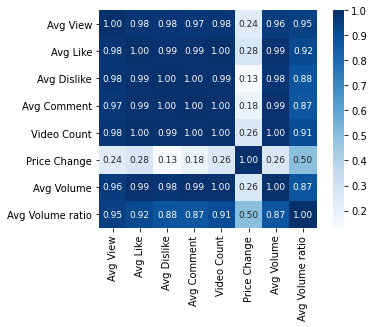

In [91]:
data = youtube5.corr(method = 'pearson')
df_heatmap = sns.heatmap(data, cbar = True, annot = True, annot_kws={'size' : 9}, fmt = '.2f', square = True, cmap = 'Blues')